Do the following in the iris dataset
1. Read the dataset to python environment
2. Do the necessary pre-processing steps
3. Find out which classification model gives the best result (try all the 
classification algorithms discussed in the session)

In [1]:
#imports the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the dataset
data = pd.read_excel("C:/DSA COURSE/iris.xls")
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# First 5 data
data.head(5)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#size
data.shape

(150, 5)

In [5]:
#information about the datset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Display statistics about data
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data PreProcessing

Missing value

In [7]:
# checking the missing value
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
#for cleaning check the distribution
#select the float datatype
freq_graph = data.select_dtypes(include="float")
freq_graph

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,NaN,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,NaN,2.0
148,6.2,3.4,5.4,2.3


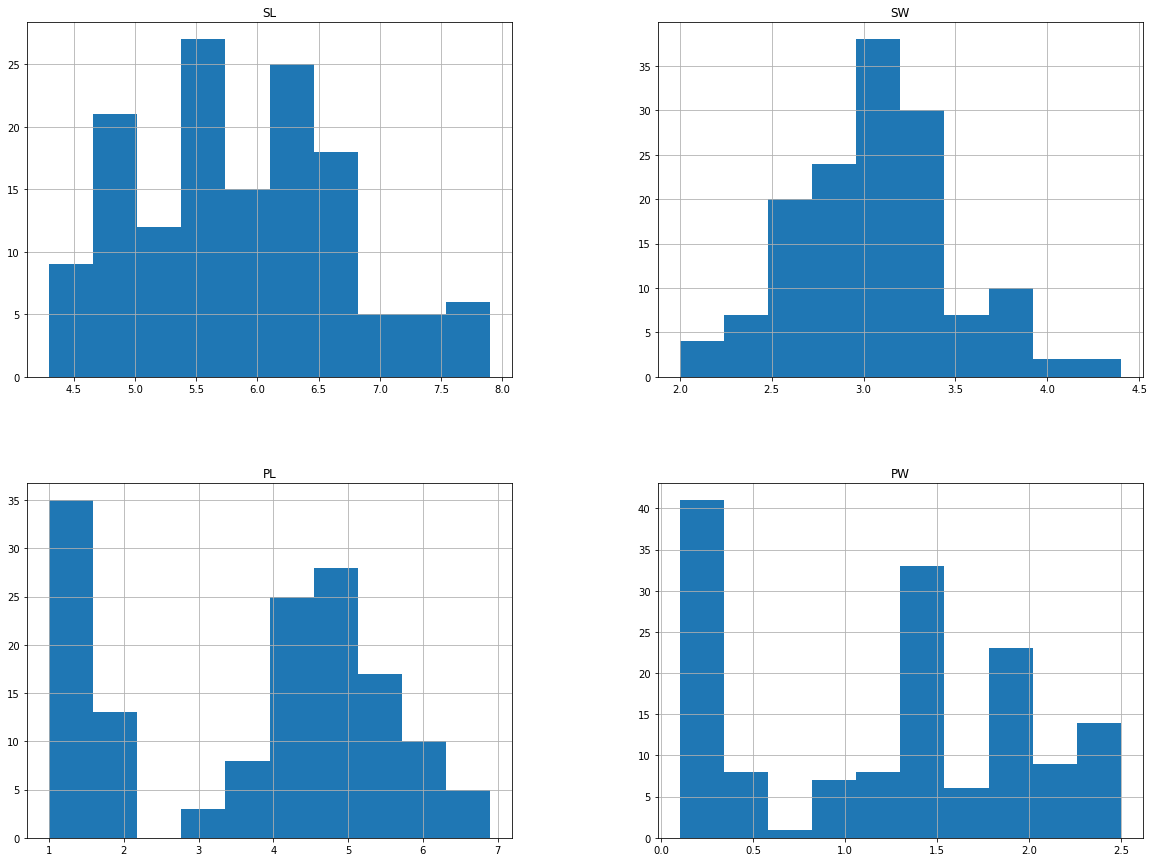

In [9]:
#plotting the frequency graph of numerical datas 
freq_graph.hist(figsize=[20,15])
plt.show()

In [10]:
# SL,SW,PL ------->normal distribution
# We can fill missing values with mean/ median/Mode

In [11]:
#by using pandas filling the missing values 
for i in[ "SL",'SW', 'PL']:
    data[i]=data[i].fillna(data[i].median())
    

In [12]:
#After cleaning
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [13]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,Iris-setosa
1,4.9,3.0,1.40,0.2,Iris-setosa
2,5.8,3.2,1.30,0.2,Iris-setosa
3,4.6,3.1,1.50,0.2,Iris-setosa
4,5.0,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,Iris-virginica
146,6.3,2.5,5.00,1.9,Iris-virginica
147,6.5,3.0,4.35,2.0,Iris-virginica
148,6.2,3.4,5.40,2.3,Iris-virginica


In [14]:
#shape
data.shape

(150, 5)

Outliers

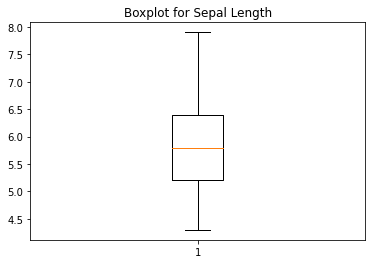

In [15]:
#Boxplot for Sepal Length
plt.boxplot(data["SL"])
plt.title("Boxplot for Sepal Length")
plt.show()

No outliers

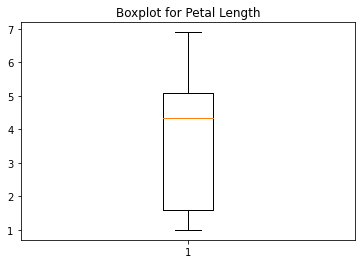

In [16]:
# Boxplot for Petal Length
plt.boxplot(data["PL"])
plt.title("Boxplot for Petal Length")
plt.show()

No outliers

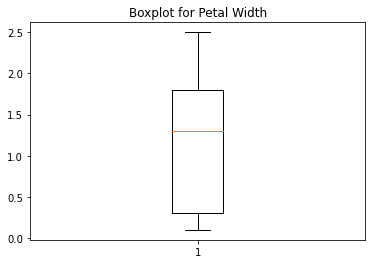

In [17]:
# Boxplot for Petal Width
plt.boxplot(data["PW"])
plt.title("Boxplot for Petal Width")
plt.show()

No outliers

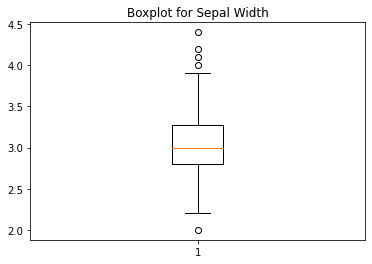

In [18]:
# Boxplot for Sepal Width
plt.boxplot(data["SW"])
plt.title("Boxplot for Sepal Width")
plt.show()

In [19]:
# 25th percentile
Q1=np.percentile(data["SW"],25)
print("Q1 =",Q1)

Q1 = 2.8


In [20]:
# 75th percentile
Q3 = np.percentile(data["SW"],75)
print("Q3 =",Q3)

Q3 = 3.275


In [21]:
# IQR
IQR=Q3-Q1
print("IQR =",IQR)

IQR = 0.4750000000000001


In [22]:
low_limit =Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [23]:
print("lower limit =",low_limit)
print("upper limit =",upper_limit)

lower limit = 2.0874999999999995
upper limit = 3.9875


In [24]:
# Outliers
outlier = []
for x in data["SW"]:
    if((x>upper_limit) or(x<low_limit)):
        outlier.append(x)
print("Outlier =",outlier)

Outlier = [4.0, 4.4, 4.1, 4.2, 2.0]


In [25]:
# remove these outliers
#know the index of these values
ind = data["SW"]>upper_limit
data.loc[ind].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [26]:
# Drop the outliers
data.drop([14, 15, 32, 33],inplace = True)

In [27]:
# New shape
data.shape

(146, 5)

Old Shape:
(150,5)


Outliers are removed

In [28]:
# data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              146 non-null    float64
 1   SW              146 non-null    float64
 2   PL              146 non-null    float64
 3   PW              146 non-null    float64
 4   Classification  146 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [29]:
# number of unique values for SL
data["SL"].nunique()

35

In [30]:
# number of unique values for SW
data["SW"].nunique()

19

In [31]:
# number of unique values for PL
data["PL"].nunique()

44

In [32]:
# number of unique values for PW
data["PW"].nunique()

22

In [33]:
# check the values in classification
data["Classification"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [34]:
# Check the unique values in classification
data["Classification"].nunique()

3

In [35]:
# count the values that are common
data["Classification"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        46
Name: Classification, dtype: int64

Encoding

In [36]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data["Classification"] = label.fit_transform(data["Classification"])

In [37]:
# first 5 datas
data.head(5)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
# count the common values in classification
data["Classification"].value_counts()

1    50
2    50
0    46
Name: Classification, dtype: int64

In [39]:
#shape
data.shape

(146, 5)

In [40]:
#check the correlation
corr_matrix =data.corr()
corr_matrix

,SL,SW,PL,PW,Classification
SL,1.000000,-0.080478,0.841457,0.807989,0.779950
SW,-0.080478,1.000000,-0.349847,-0.281226,-0.358369
PL,0.841457,-0.349847,1.000000,0.933260,0.924392
PW,0.807989,-0.281226,0.933260,1.000000,0.954827
Classification,0.779950,-0.358369,0.924392,0.954827,1.000000


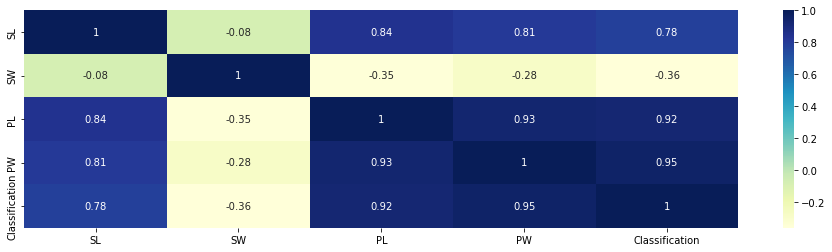

In [41]:
#Heatmap
plt.subplots(figsize=(16,4))
sns.heatmap(corr_matrix,annot = True,cmap="YlGnBu")
plt.show()

Sepal Length have high correlation with petal length .No need to drop because only 4 columns

In [42]:
#Target varibale-------->Classification

In [43]:
# Independent variables
x=data.drop(["Classification"],axis = 1)
x

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


In [44]:
#Dependent / Target variable
y=data["Classification"]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 146, dtype: int32

# Classification Models

In [45]:
# split the datas
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = 0.2)

In [46]:
x_train

,SL,SW,PL,PW
4,5.0,3.6,1.40,0.2
28,5.2,3.4,4.35,0.2
127,6.1,3.0,4.90,1.8
132,6.4,2.8,5.60,2.2
18,5.7,3.8,1.70,0.3
...,...,...,...,...
75,6.6,3.0,4.40,1.4
110,6.5,3.2,5.10,2.0
16,5.4,3.9,1.30,0.4
96,5.7,2.9,4.20,1.3


In [47]:
x_test

,SL,SW,PL,PW
49,5.0,3.3,1.4,0.2
101,5.8,2.7,5.1,1.9
29,4.7,3.2,1.6,0.2
21,5.8,3.7,1.5,0.4
46,5.1,3.8,1.6,0.2
124,6.7,3.0,5.7,2.1
31,5.4,3.4,1.5,0.4
84,5.4,3.0,4.5,1.5
70,5.9,3.2,4.8,1.8
20,5.4,3.4,1.7,0.2


In [48]:
y_train

4      0
28     0
127    2
132    2
18     0
      ..
75     1
110    2
16     0
96     1
106    2
Name: Classification, Length: 116, dtype: int32

In [49]:
y_test

49     0
101    2
29     0
21     0
46     0
124    2
31     0
84     1
70     1
20     0
12     0
119    2
145    2
82     1
141    2
40     0
64     1
143    2
34     0
59     1
100    2
126    2
11     0
71     1
35     0
97     1
68     1
105    2
118    2
9      0
Name: Classification, dtype: int32

# Logistic Regression

In [50]:
#import Logistic Regression 
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
# Train the model using trainnig sets
log_model = log_model.fit(x_train,y_train)
y_pred = log_model.predict(x_test)


C:\Users\Shaima Junaid\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
# Import confusion_matrix,accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score

In [52]:
#predic metric to get performance
print("Accuracy is " ,accuracy_score(y_test,y_pred)*100 ,"%")

Accuracy is  93.33333333333333 %


In [53]:
#confusion matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix  \n",confusion_matrix)

Confusion Matrix  
 [[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]


# K Nearest Neighbour

In [54]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [55]:
# assigning empty list
metric_k =[]
# kepping some values to neighbours 
neighbors = np.arange(3,15)
neighbors

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [56]:
# create a classifier using euclidean
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k,metric ="euclidean")
    classifier.fit(x_train,y_train)
    y_prediction = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_prediction)
    metric_k.append(acc)

In [57]:
metric_k

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 1.0,
 1.0]

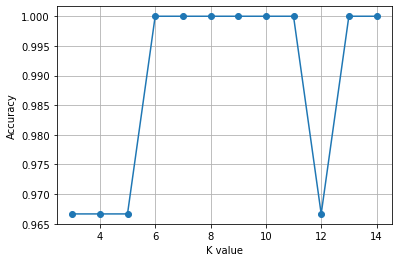

In [58]:
# plot the k value
plt.plot(neighbors,metric_k,'o-')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.grid()

In [59]:
#K = 7,8,9,10,11,14 has the maximum value
#put k = 14 in n_neighbors
classifier = KNeighborsClassifier(n_neighbors =14,metric ="euclidean")
classifier.fit(x_train,y_train)
y_prediction = classifier.predict(x_test)

In [60]:
#Accuracy
print("Accuracy is " ,accuracy_score(y_test,y_prediction)*100 ,"%")

Accuracy is  100.0 %


In [61]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_knn = confusion_matrix(y_test,y_prediction)
print("Confusion Matrix  \n",confusion_matrix_knn)

Confusion Matrix  
 [[12  0  0]
 [ 0  8  0]
 [ 0  0 10]]


# SVM

In [62]:
#import 
from sklearn.svm import SVC

In [63]:
# svm using linear kernel
svm_cls = SVC(kernel = "linear")
svm_cls = svm_cls.fit(x_train,y_train)
y_pred_svm = svm_cls.predict(x_test)

In [64]:
#Accuracy
print("Accuracy is " ,accuracy_score(y_test,y_pred_svm)*100 ,"%")

Accuracy is  96.66666666666667 %


In [65]:
# Confusion matrix
confusion_matrix_svm = confusion_matrix(y_test,y_pred_svm)
print("Confusion Matrix = \n",confusion_matrix_svm)

Confusion Matrix = 
 [[12  0  0]
 [ 0  7  1]
 [ 0  0 10]]


# RBF

In [66]:
# SVM using RBF kernel
svm_cls1 = SVC(kernel = "rbf")
svm_cls1 = svm_cls1.fit(x_train,y_train)
y_pred_svm1 = svm_cls1.predict(x_test)

In [67]:
# Accuracy
print("Accuracy is " ,accuracy_score(y_test,y_pred_svm1)*100 ,"%")

Accuracy is  96.66666666666667 %


In [68]:
#confusion matrix
confusion_rbf = confusion_matrix(y_test,y_pred_svm1)
print("Confusion Matrix = \n",confusion_rbf)

Confusion Matrix = 
 [[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]


# Decision Tree

In [69]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt_cls = DecisionTreeClassifier()
dt_cls = dt_cls.fit(x_train,y_train)
y_pred_dt = dt_cls.predict(x_test)

In [70]:
#Accuracy
print("Accuracy is " ,accuracy_score(y_test,y_pred_dt)*100 ,"%")

Accuracy is  93.33333333333333 %


In [71]:
#confusion matrix
confusion_df = confusion_matrix(y_test,y_pred_dt)
print("Confusion Matrix = \n",confusion_df)

Confusion Matrix = 
 [[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]


# Random Forest

In [72]:
# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier()
rf_cls = rf_cls.fit(x_train,y_train)
y_pred_rf = rf_cls.predict(x_test)

In [73]:
#Accuracy
print("Accuracy is " ,accuracy_score(y_test,y_pred_rf)*100 ,"%")

Accuracy is  93.33333333333333 %


In [74]:
#Confusion Matrix
confusion_rf = confusion_matrix(y_test,y_pred_rf)
print("Confusion Matrix = \n",confusion_rf)

Confusion Matrix = 
 [[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]




K Nearest Neighbour classification model gives the best result because got accuracy as 100%